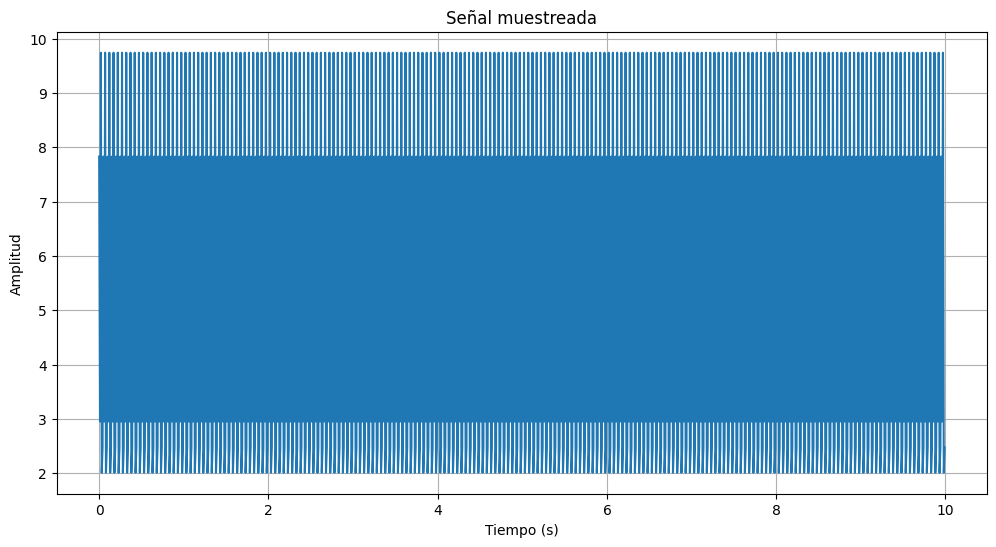

In [67]:
import numpy as np
import matplotlib.pyplot as plt

fs = 100 # la frecuencia max es 40hz el doble es 80 pero para asegurar se usa 100
T = 10
t = np.arange(0, T, 1/fs)

a = 0
k = 2 * (a + 1)
x_t = 4 * np.cos(80 * np.pi * t + np.pi / 4) + k * np.sin(40 * np.pi * t) + 5

plt.figure(figsize=(12, 6))
plt.plot(t, x_t)
plt.title("Señal muestreada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

In [68]:
def welch_periodogram(x, fs, M, S):
    step = M - S
    K = (len(x) - M) // step + 1
    Pxx = np.zeros(M)
    window = np.hamming(M)

    for k in range(K):
        start = k * step
        segment = x[start:start + M] * window
        fft_segment = np.fft.fft(segment, n=M)
        Pxx_segment = (np.abs(fft_segment) ** 2) / (fs * np.sum(window ** 2))
        Pxx += Pxx_segment

    Pxx /= K
    f = np.fft.fftfreq(M, d=1/fs)[:M // 2]
    Pxx = Pxx[:M // 2]
    return f, Pxx

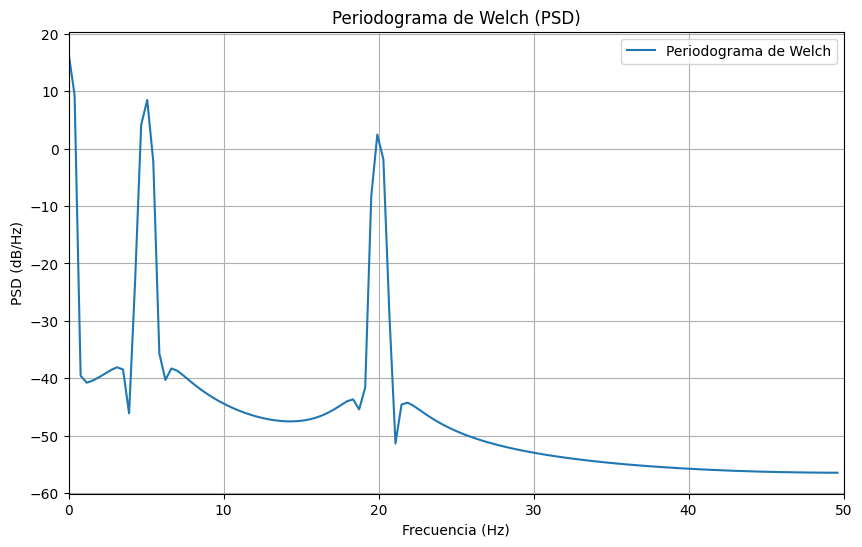

In [69]:
M = 256
S = 128
f, Pxx = welch_periodogram(x, fs, M, S)

plt.figure(figsize=(10, 6))
plt.plot(f, 10 * np.log10(Pxx), label="Periodograma de Welch")
plt.title("Periodograma de Welch (PSD)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("PSD (dB/Hz)")
plt.xlim(0, fs / 2)
plt.grid()
plt.legend()
plt.show()


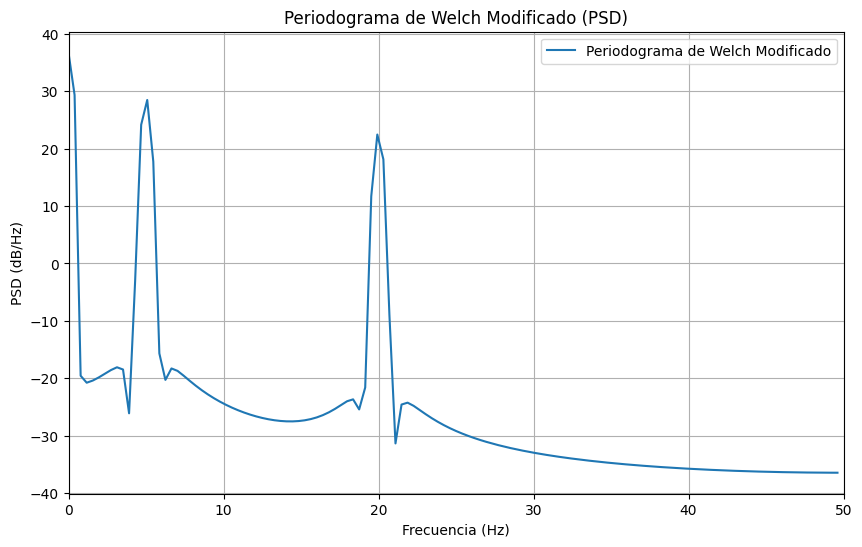

In [70]:
def welch_periodogram_with_dft_modified(x, fs, M, S):
    step = M - S
    K = (len(x) - M) // step + 1
    Pxx = np.zeros(M)
    dft_segments = []
    window = np.hamming(M)
    W = np.sum(window ** 2)

    for k in range(K):
        start = k * step
        segment = x[start:start + M]
        segment_windowed = segment * window
        X_k = np.fft.fft(segment_windowed)
        dft_segments.append(X_k)
        P_k = (1 / W) * (np.abs(X_k) ** 2)
        Pxx += P_k

    Pxx /= K
    f = np.fft.fftfreq(M, d=1 / fs)[:M // 2]
    Pxx = Pxx[:M // 2]
    return f, Pxx

fs = 100
T = 10
t = np.arange(0, T, 1 / fs)
x = 4 * np.cos(10 * np.pi * t + np.pi / 4) + 2 * np.sin(40 * np.pi * t) + 5
M = 256
S = 128
f, Pxx = welch_periodogram_with_dft_modified(x, fs, M, S)

plt.figure(figsize=(10, 6))
plt.plot(f, 10 * np.log10(Pxx), label="Periodograma de Welch Modificado")
plt.title("Periodograma de Welch Modificado (PSD)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("PSD (dB/Hz)")
plt.xlim(0, fs / 2)
plt.grid()
plt.legend()
plt.show()


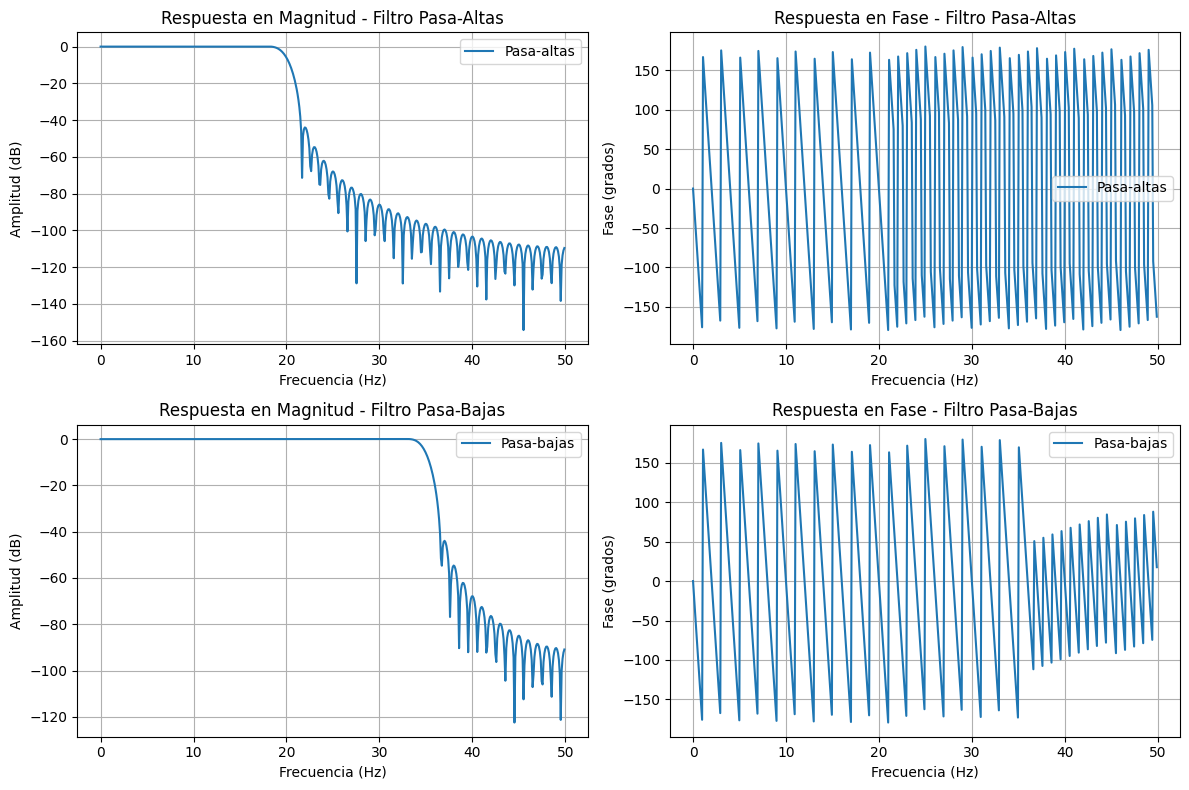

In [71]:
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt
import numpy as np

fs = 100
a = 20
b = 35
nyquist = fs / 2

hp = a / nyquist
lp = b / nyquist

hp_filter = firwin(101, hp, window='hann')
lp_filter = firwin(101, lp, window='hann')

w_hp, h_hp = freqz(hp_filter)
w_lp, h_lp = freqz(lp_filter)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(w_hp * nyquist / np.pi, 20 * np.log10(np.abs(h_hp)), label="Pasa-altas")
plt.title("Respuesta en Magnitud - Filtro Pasa-Altas")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud (dB)")
plt.grid()
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(w_hp * nyquist / np.pi, np.angle(h_hp, deg=True), label="Pasa-altas")
plt.title("Respuesta en Fase - Filtro Pasa-Altas")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (grados)")
plt.grid()
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(w_lp * nyquist / np.pi, 20 * np.log10(np.abs(h_lp)), label="Pasa-bajas")
plt.title("Respuesta en Magnitud - Filtro Pasa-Bajas")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud (dB)")
plt.grid()
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(w_lp * nyquist / np.pi, np.angle(h_lp, deg=True), label="Pasa-bajas")
plt.title("Respuesta en Fase - Filtro Pasa-Bajas")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (grados)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
